In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('wine.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.describe

<bound method NDFrame.describe of        type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
0     white            7.0             0.270  ...       0.45      8.8        6
1     white            6.3             0.300  ...       0.49      9.5        6
2     white            8.1             0.280  ...       0.44     10.1        6
3     white            7.2             0.230  ...       0.40      9.9        6
4     white            7.2             0.230  ...       0.40      9.9        6
...     ...            ...               ...  ...        ...      ...      ...
6492    red            6.2             0.600  ...       0.58     10.5        5
6493    red            5.9             0.550  ...        NaN     11.2        6
6494    red            6.3             0.510  ...       0.75     11.0        6
6495    red            5.9             0.645  ...       0.71     10.2        5
6496    red            6.0             0.310  ...       0.66     11.0        6

[6497 rows x 13 c

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:, 1:-1])
x[:, 1:3] = imputer.transform(x[:, 1:3])

In [ ]:
mean = df['fixed acidity'].mean()
print(mean)
df['fixed acidity'].fillna(mean , inplace = True)
df['fixed acidity'].isna().sum()

7.2165793124710795


0

In [ ]:
mean = df['volatile acidity'].mean()
print(mean)
df['volatile acidity'].fillna(mean , inplace = True)
df['volatile acidity'].isna().sum()

0.33969101556480247


0

In [ ]:
mean = df['citric acid'].mean()
print(mean)
df['citric acid'].fillna(mean , inplace = True)
df['citric acid'].isna().sum()

0.3187218971358124


0

In [ ]:
mean = df['residual sugar'].mean()
print(mean)
df['residual sugar'].fillna(mean , inplace = True)
df['residual sugar'].isna().sum()

5.444326404926885


0

In [ ]:
mean = df['chlorides'].mean()
print(mean)
df['chlorides'].fillna(mean , inplace = True)
df['chlorides'].isna().sum()

0.05604157043879931


0

In [ ]:
mean = df['pH'].mean()
print(mean)
df['pH'].fillna(mean , inplace = True)
df['pH'].isna().sum()

3.218395499383475


0

In [ ]:
mean = df['sulphates'].mean()
print(mean)
df['sulphates'].fillna(mean , inplace = True)
df['sulphates'].isna().sum()

0.5312151547820745


0

In [ ]:
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
model = LabelEncoder()

In [ ]:
df['type'] = model.fit_transform(df['type'])
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


In [ ]:
df['type'].value_counts()

1    4898
0    1599
Name: type, dtype: int64

In [ ]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
mapping = {3: "Low" , 4: "Low" , 5: "Medium" , 6: "Medium" , 7:"Medium" , 8:"High" , 9:"High"}
df['quality'] = df['quality'].map(mapping)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,Medium
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,Medium
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,Medium
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,Medium
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,Medium
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,Medium
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,Medium
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,Medium


In [ ]:
df['quality'].value_counts()

Medium    6053
Low        246
High       198
Name: quality, dtype: int64

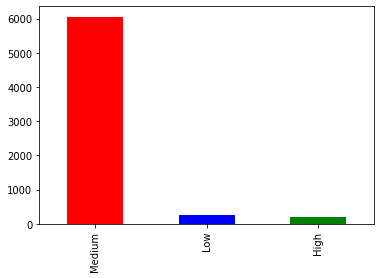

In [ ]:
df['quality'].value_counts().plot(kind="bar",color=["red","blue","green"])

In [ ]:
mapping = {"Low" : 0 , "Medium" : 1 , "High" : 2}
df['quality'] = df['quality'].map(mapping)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,1
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,1
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,1
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,1
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,1
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,1


In [ ]:
df1 = df[df.quality == 0]
df2 = df[df.quality == 1]
df3 = df[df.quality == 2]
df1.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
46,1,6.2,0.450,0.26,4.4,0.063000,63.0,206.0,0.9940,3.27,0.52,9.8,0
98,1,9.8,0.360,0.46,10.5,0.056042,4.0,83.0,0.9956,2.89,0.30,10.1,0
115,1,5.5,0.485,0.00,1.5,0.065000,8.0,103.0,0.9940,3.63,0.40,9.7,0
147,1,6.4,0.595,0.14,5.2,0.058000,15.0,97.0,0.9951,3.38,0.36,9.0,0
172,1,7.6,0.480,0.37,0.8,0.037000,4.0,100.0,0.9902,3.03,0.39,11.4,0


In [ ]:
x = df.drop('quality', axis=True)
y = df['quality']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = 0.25 , random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score , confusion_matrix

In [ ]:
regressor = LogisticRegression()
regressor.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = regressor.predict(x_test)
y_pred
accuracy_score(y_test , y_pred)

0.9304615384615385

In [ ]:
confusion_matrix(y_test,y_pred)

array([[   2,   64,    0],
       [   1, 1510,    1],
       [   0,   47,    0]])

In [ ]:
regressor.predict(scaler.transform([[0, 4.2, 0.123, 0.90, 8.3, 0.333, 57.6, 98.55, 1.00100, 10.05, 0.440000, 90.5]]))

array([2])

In [ ]:
svc = SVC()
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred1 = svc.predict(x_test)
y_pred1
accuracy_score(y_test,y_pred1)

0.9304615384615385

In [ ]:
confusion_matrix(y_test,y_pred1)

array([[   0,   66,    0],
       [   0, 1512,    0],
       [   0,   47,    0]])

In [ ]:
svc.predict(scaler.transform([[0, 1.2, 0.123, 0.90, 2.3, 0.333, 17.6, 58.55, 1.00100, 60.05, 0.440000, 90.5]]))

array([1])

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred2 = classifier.predict(x_test)
y_pred2
accuracy_score(y_test , y_pred2)

0.9076923076923077

In [ ]:
confusion_matrix(y_test,y_pred2)

array([[  16,   49,    1],
       [  42, 1433,   37],
       [   0,   21,   26]])

In [ ]:
classifier.predict(scaler.transform([[0, 4.2, 0.123, 0.90, 8.3, 0.333, 27.6, 118.55, 1.00100, 70.05, 0.440000, 90.5]]))

array([2])

In [ ]:
forest = RandomForestClassifier(n_estimators=10 ,criterion='entropy' , random_state=0)
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred3 = forest.predict(x_test)
y_pred3
accuracy_score(y_test , y_pred3)

0.9452307692307692

In [ ]:
confusion_matrix(y_test,y_pred3)

array([[  10,   56,    0],
       [   3, 1508,    1],
       [   0,   29,   18]])

In [ ]:
forest.predict(scaler.transform([[0, 1.2, 0.123, 0.90, 2.3, 0.333, 127.6, 98.55, 1.00100, 55.05, 0.440000, 60.5]]))

array([1])

In [ ]:
neighbor = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 2)
neighbor.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
y_pred4 = neighbor.predict(x_test)
y_pred4
accuracy_score(y_test , y_pred4)

0.9316923076923077

In [ ]:
confusion_matrix(y_test,y_pred4)

array([[   1,   65,    0],
       [   0, 1511,    1],
       [   0,   45,    2]])

In [ ]:
neighbor.predict(scaler.transform([[1, 5.5,	0.485,	0.00, 1.5, 0.065000,	8.0,	103.0,	0.9940, 	3.63,	0.40,	9.7]]))

array([1])

In [ ]:
naive = GaussianNB()
naive.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred5 = naive.predict(x_test)
y_pred5
accuracy_score(y_test , y_pred5)

0.7956923076923077

In [ ]:
confusion_matrix(y_test,y_pred5)

array([[  10,   53,    3],
       [  61, 1266,  185],
       [   0,   30,   17]])

In [ ]:
naive.predict(scaler.transform([[0, 4.2, 0.123, 0.90, 8.3, 0.333, 57.6, 98.55, 1.00100, 10.05, 0.440000, 90.5]]))

array([2])